<a href="https://colab.research.google.com/github/snehalad/email-classification-using-NLP/blob/main/email_classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Detection Model -> Spam or Not 📧 

Purpose of this notebook to classify email in two categories spam or not using NLP

About Dataset:
- We're using public dataset which includes two columns text (email) and spam (label)
- if text label is 1 it's spam otherwise 0.
- [Dataset Link](https://www.kaggle.com/bagavathypriya/email-spam-dataset)

NLP Flow
```
text -> turn it into number -> build a model -> train a model -> use patterns for making prediction
```



## Get Dataset And Visualize (Extract)

In [1]:
!wget https://raw.githubusercontent.com/snehalad/datasets/main/Email%20spam.csv

--2023-03-23 12:43:59--  https://raw.githubusercontent.com/snehalad/datasets/main/Email%20spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8960482 (8.5M) [text/plain]
Saving to: ‘Email spam.csv’

Email spam.csv      100%[===================>]   8.54M  --.-KB/s    in 0.1s    

2023-03-23 12:43:59 (87.5 MB/s) - ‘Email spam.csv’ saved [8960482/8960482]



In [57]:
import pandas as pd
df = pd.read_csv("/content/Email spam.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
len(df)

5728

In [8]:
df.spam.value_counts().head(32)

0    4360
1    1368
Name: spam, dtype: int64

<Axes: >

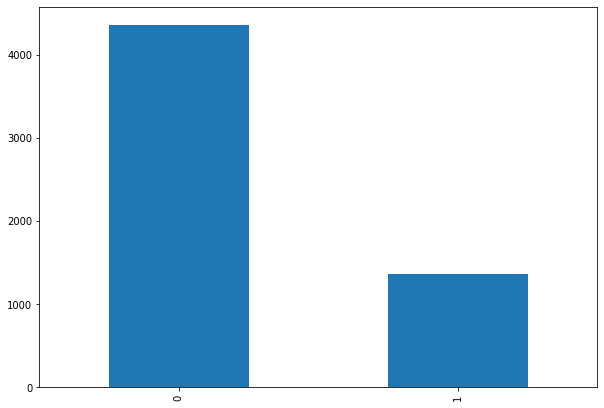

In [14]:
# plot value 0 & 1 value count
df['spam'].value_counts().plot(kind='bar', figsize=(10, 7))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Preprocess Data (Transform)

In [17]:
# check out missing values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [21]:
# duplicate data
df.duplicated().sum()

33

In [23]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [24]:
len(df) # previous len od dataset 5728

5695

In [27]:
df.text[:5]

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
Name: text, dtype: object

Now we will remove "Subject:" from text

In [63]:
# what we want
df.loc[1, 'text'].split(' ', 1)[1]

'the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [68]:
# to handle this warning (a value is trying to be set on a copy of a slice from a dataframe)
pd.options.mode.chained_assignment = None  # default='warn'

In [69]:
for i in range(len(df)):
  df.text[i] = df.text[i].split(' ', 1)[1]

In [70]:
df.head()

,text,spam
0,irresistible your corporate identity lt is re...,1
1,stock trading gunslinger fanny is merrill but...,1
2,new homes made easy im wanting to show you th...,1
3,color printing special request additional inf...,1
4,"not have money , get software cds from here ! ...",1


Now we have clean data!!!

## Split data into train and test

In [71]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df['text'].to_numpy(),
                                                    df['spam'].to_numpy(),
                                                    test_size=0.1,
                                                    random_state=42)

In [77]:
# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5155,), (573,), (5155,), (573,))

In [81]:
X_train[:2], y_train[:2]

(array([": invitation to speak at infocast ' s managing summer price  volatilit y conference in houston  thanks , vince - - it sounds like a good opportunity . if you ' d like i can call  him directly .  joe  vince j kaminski  10 / 17 / 2000 03 : 55 pm  to : joseph hrgovcic / hou / ect @ ect  cc : vince j kaminski / hou / ect @ ect  subject : invitation to speak at infocast ' s managing summer price volatilit y  conference in houston  joe ,  any interest in speaking ?  vince  - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 10 / 17 / 2000  04 : 01 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -  britta bothe on 10 / 17 / 2000 12 : 38 : 33 pm  to : vkamins @ enron . com  cc :  subject : invitation to speak at infocast ' s managing summer price volatilit y  conference in houston  dear ms . kaminsky :  as i just mentioned on your voicemail , infocast is going to host a managing  summer price volatility course , january 30 - february 1 , 200

## Converting into Number